In [135]:
# Imports
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from gensim.models import Word2Vec

In [136]:
# Download NLTK resources (run this once)
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bendi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bendi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bendi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [137]:
# Load data
data = pd.read_excel("data.ods", engine="odf")
data.head()

Text  Score
0  Danske Karl Dane var en legende i 1920'ernes H...     57
1  Velkommen til Bull Island Rock Festival 1972 -...     73
2  Vidste du, at det er en dansker der står bag U...     68
3  Disseker her eller tage med hjem? Hvor skaffer...     72
4  Der var meget, vi ikke nåede at tale om under ...     78

In [138]:
data.shape

(122, 2)

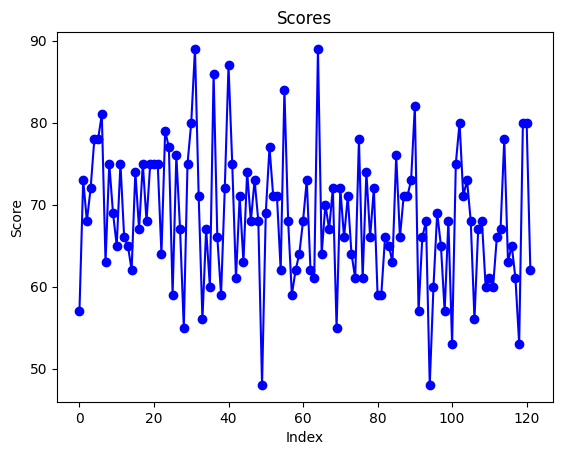

In [139]:
plt.plot(data.index, data['Score'], marker='o', linestyle='-', color='b')
plt.xlabel("Index")
plt.ylabel("Score")
plt.title("Scores")
plt.show()

In [140]:
plt.hist(data['Score'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.show()


In [141]:
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove special characters, numbers, and URLs
    text = re.sub(r"[^0-9a-zA-Z]", " ", text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words("danish") + list(string.punctuation))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a single string
    processed_text = " ".join(lemmatized_tokens)

    return processed_text

In [142]:
data["Text"] = data["Text"].apply(preprocess_text)
data.head()

Text  Score
0  danske karl dane legende 1920 erne hollywood g...     57
1  velkommen bull island rock festival 1972 husk ...     73
2  vidste dansker st r bag usa legoland ikonet mo...     68
3  disseker tage hjem skaffer lige take away krop...     72
4  n ede tale vores optagelse p copenhell frygt e...     78

In [143]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data["Text"], data["Score"], test_size=0.2, random_state=42)
X_train.shape

(97,)

In [144]:
# Create the TfidfVectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [145]:
# Build the KNN regression model
model = KNeighborsRegressor(n_neighbors=2)

In [146]:
# Train the model
model.fit(X_train_tfidf, y_train)

KNeighborsRegressor(n_neighbors=2)

In [147]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

In [148]:
# Calculate Mean Squared Error (MSE) and R-squared for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 97.38
R-squared: -0.22583081570996977


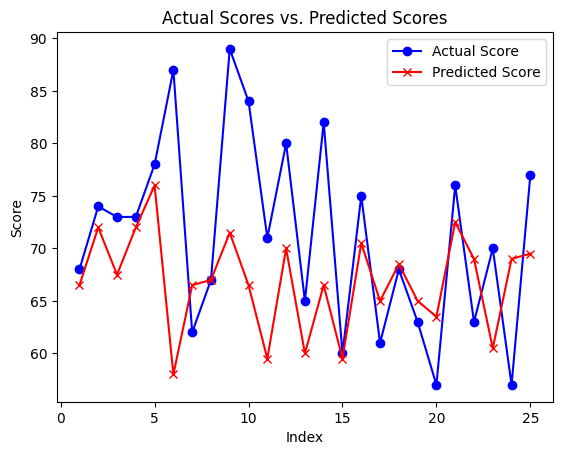

In [149]:
indicied = list(range(1, len(y_test) + 1))

# Plotting the scores against the index
plt.plot(indicied, y_test, marker='o', linestyle='-', color='b', label='Actual Score')
plt.plot(indicied, y_pred, marker='x', linestyle='-', color='r', label='Predicted Score')
plt.xlabel("Index")
plt.ylabel("Score")
plt.title("Actual Scores vs. Predicted Scores")
plt.legend()
plt.show()

In [151]:
# Now you can use the trained model to predict scores for new text inputs
new_reviews = 'Dagens historie er en højdespringer på vanvidsbarometeret - og med god grund! Den franske bogholder Bernard Boursicot er måske den eneste i verden, der med rette kan angive sit forhold på Facebook som "Kompliceret." Da han fik job på den franske ambassade i Kina blev han nemlig hurtigt best bros med den mandlige, kinesiske operasanger, Shi Pei Pu. Da det så senere viste sig, at Pei Pu i virkeligheden var en kvinde blev bogholderen selvfølgelig med det samme stormende forelsket. Og selvom mange nok allerede her ville beskrive forholdet som specielt, så blev det hele endnu mere mudret, da Pei Pu kort tid efter kunne fortælle at hun nu var gravid med Boursicots barn. For inden længe var parret omdrejningspunktet for en konspiratorisk fortælling om spionage og statshemmeligheder - og med et plot-twist, der ender med at blæse både Bernard Boursicot og Peter Løhde helt bagover.'
new_reviews = preprocess_text(new_reviews)
new_reviews_tfidf = vectorizer.transform([new_reviews])

predicted_scores = model.predict(new_reviews_tfidf)

print("Predicted score:", predicted_scores[0])
print("Actual score: 78")

Predicted score: 61.0
Real score: 78
